In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit

In [2]:
i=np.arange(0,10)
k=np.arange(10,63)
frecuencia=[1,
2,
4,
6,
8,
10,
15,
20,
50,
100,
200,
300,
500,
800,
1000,
2000,
3000,
5000,
8000,
10000,
10000,
11000,
13000,
15000,
18000,
20000,
30000,
50000,
80000,
100000,
200000,
300000,
500000,
800000,
1000000,
900000,
1100000,
1200000,
1300000,
1400000,
1500000,
1600000,
1700000,
1800000,
1900000,
2000000,
2100000,
2200000,
2300000,
2400000,
2500000,
2800000,
3000000,
3500000,
4000000,
4500000,
5000000,
6000000,
7000000,
8000000,
9000000,
10000000,
20000000]

In [3]:
seno=[]
for j in i:
    #seno.append(np.genfromtxt('/home/josefina/Desktop/Datos0/ALL000{}/F000{}CH1.CSV'.format(j,j), delimiter=',',usecols = (3, 4)))
    seno.append(np.genfromtxt("C:\\Users\\pc\\Downloads\\Labo6y7\\Senoidal\\ALL000{}\\F000{}CH1.CSV".format(j,j), delimiter=',',usecols = (3, 4)))
    
for j in k:
    #seno.append(np.genfromtxt('/home/josefina/Desktop/Datos0/ALL00{}/F00{}CH1.CSV'.format(j,j), delimiter=',',usecols = (3, 4)))
    seno.append(np.genfromtxt("C:\\Users\\pc\\Downloads\\Labo6y7\\Senoidal\\ALL00{}\\F00{}CH1.CSV".format(j,j), delimiter=',',usecols = (3, 4)))

In [ ]:
plt.figure(figsize=(15,20))
for j in i:
    plt.subplot(5,2,j+1)
    plt.plot(seno[j][:,0],seno[j][:,1])
    
plt.show()

In [4]:
f_sin = lambda x, A, B, C, D: A * np.sin(B*x+C)+D

# Ajustamos, pero con las funciónes logaritmicas. Usamos propagación de errores
def ajusteseno(datos,po):
    popt_sin, pcov_sin = curve_fit(f_sin, datos[:,0], datos[:,1], sigma = 0.005*np.ones(len(datos[:,1])), absolute_sigma=True,p0=po) #po mi parametros iniciales que a ojo yo veo que son. por default son 1.
    return(popt_sin, pcov_sin)

In [5]:
seno[0]=seno[0][100:2300,:]
seno[1]=seno[1][100:2300,:]


In [ ]:
popt_sin, pcov_sin=ajusteseno(seno[30],po=[0.4,2*np.pi*frecuencia[30],0.04,0])
popt_sin
print pcov_sin[0]

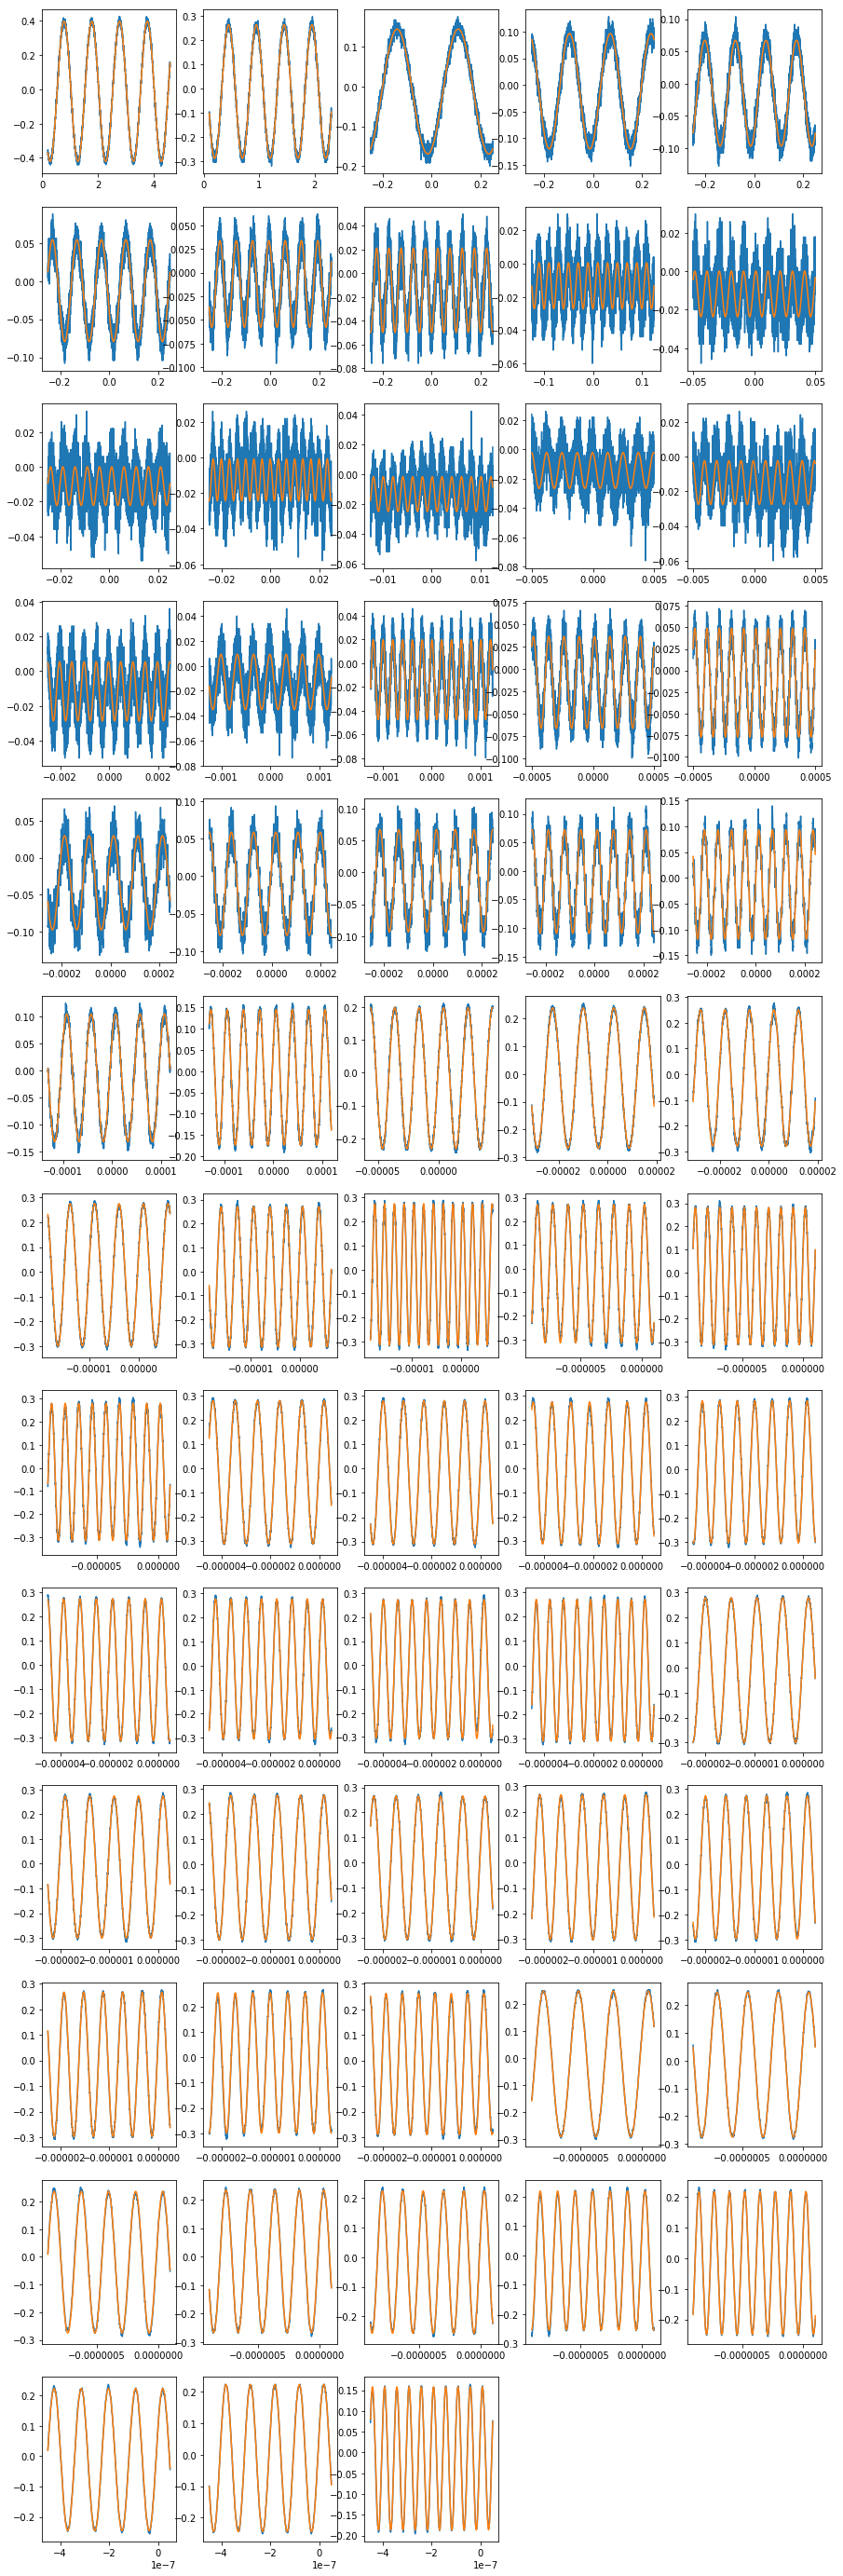

In [6]:
l=np.arange(0,63)
A=[]
Aperr=[]
plt.figure(figsize=(15,50))
for j in l:
    popt_sin, pcov_sin=ajusteseno(seno[j],po=[0.7,2*np.pi*frecuencia[j],0.04,0])
    A.append(popt_sin[0])
    Aperr.append(np.sqrt(pcov_sin[0,0])) #CHEQUEAR si no entendí mal, este sería el error de la amplitud
    plt.subplot(13,5,j+1)
    plt.plot(seno[j][:,0],seno[j][:,1])
    plt.plot(seno[j][:,0],popt_sin[0] * np.sin(popt_sin[1]*seno[j][:,0]+popt_sin[2])+popt_sin[3])

plt.show()

In [ ]:
m=np.arange(2,25)
A=[]
Aperr=[]
plt.figure(figsize=(15,50))
for j in m:
    popt_sin, pcov_sin=ajusteseno(seno[j],po=[0.9,2*np.pi*frecuencia[j],0.04,0])
    A.append(popt_sin[0])
    Aperr.append(np.sqrt(pcov_sin[0,0])) #CHEQUEAR si no entendí mal, este sería el error de la amplitud
    plt.subplot(13,5,j+1)
    plt.plot(seno[j][:,0],seno[j][:,1])
    plt.plot(seno[j][:,0],popt_sin[0] * np.sin(popt_sin[1]*seno[j][:,0]+popt_sin[2])+popt_sin[3])

plt.show()

In [ ]:
j = 7
popt_sin, pcov_sin=ajusteseno(seno[j],po=[0.063,2*np.pi*frecuencia[j],0.01,-0.01])

print popt_sin[0]*2 , popt_sin[2]

plt.figure(figsize=(7,5))

plt.plot(seno[j][:,0],seno[j][:,1])
plt.plot(seno[j][:,0],popt_sin[0] * np.sin(popt_sin[1]*seno[j][:,0]+popt_sin[2])+popt_sin[3])

plt.show()

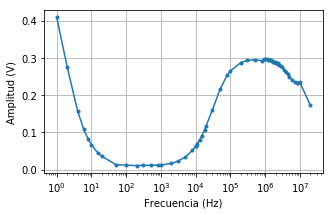

In [16]:
plt.figure(figsize=(5,3))
plt.errorbar(frecuencia,np.abs(A),Aperr, fmt= '.-', ecolor='r')#,'.-')
plt.semilogx()
plt.grid()
plt.xlabel('Frecuencia (Hz)')#, fontsize='x-large')
plt.ylabel('Amplitud (V)')
#plt.title('Curva barrido con sinusoidal')
plt.savefig('Calibracion_piezo.png')
plt.show()

In [ ]:
Vpp = 2.0*np.abs(A)
errVpp = np.sqrt(2)*np.abs(Aperr)

plt.figure(figsize=(10,7))
plt.errorbar(frecuencia, Vpp, errVpp, fmt= '.-', ecolor='r')#, )#,'.-')
plt.semilogx()
plt.grid()
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Vpp (V)')
plt.title('Curva barrido con sinusoidal')
#plt.savefig('Calibr_Vpp_sen.png')
plt.show()